Linear regression by using Deep Neural network: Implement Boston housing price prediction problem by Linear regression using Deep Neural network. Use Boston House price prediction dataset.

In [ ]:
import pandas as pd
import numpy as np

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', names=column_names,header=None,delimiter=r"\s+")
#Median value of homes in $1000s

df.head(n=10)

: 

In [10]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'MEDV']
y = df.loc[:, df.columns == 'MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [11]:
# Performing Normalization

mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [12]:
#Building Model
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(128, input_shape=(13, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1792      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [13]:
#Train out model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05)

Epoch 1/100
11/11 [==============================] - 1s 29ms/step - loss: 575.1503 - mae: 22.0850 - val_loss: 580.9819 - val_mae: 22.2004
Epoch 2/100
11/11 [==============================] - 0s 7ms/step - loss: 515.6472 - mae: 20.5833 - val_loss: 515.8021 - val_mae: 20.7238
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 440.9190 - mae: 18.6676 - val_loss: 428.4550 - val_mae: 18.5881
Epoch 4/100
11/11 [==============================] - 0s 8ms/step - loss: 343.7835 - mae: 16.1407 - val_loss: 317.7600 - val_mae: 15.6933
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 232.4357 - mae: 13.0543 - val_loss: 202.2115 - val_mae: 12.2333
Epoch 6/100
11/11 [==============================] - 0s 7ms/step - loss: 134.5911 - mae: 9.6374 - val_loss: 112.2671 - val_mae: 9.1037
Epoch 7/100
11/11 [==============================] - 0s 9ms/step - loss: 80.8657 - mae: 7.1550 - val_loss: 66.9125 - val_mae: 6.5834
Epoch 8/100
11/11 [===========================

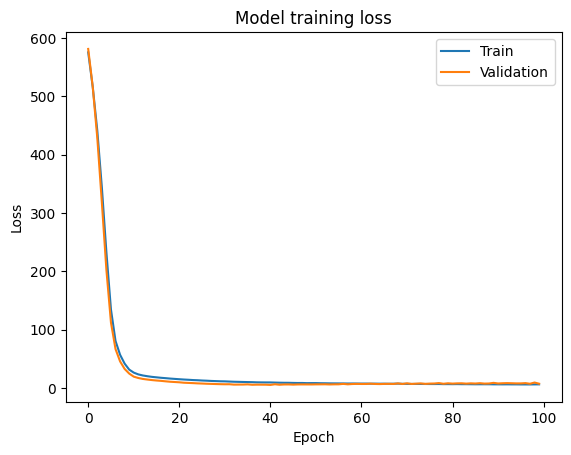

In [14]:
import matplotlib.pyplot as plt
# Plot the training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [15]:
#Evaluating Model
mse_nn, mae_nn = model.evaluate(X_test, y_test)

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

5/5 [==============================] - 0s 2ms/step - loss: 17.7912 - mae: 2.6596
Mean squared error on test data:  17.791162490844727
Mean absolute error on test data:  2.659621477127075


In [16]:
# Comparison with traditional approach
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print('Mean squared error on test data: ', mse_lr)
print('Mean absolute error on test data: ', mae_lr)

Mean squared error on test data:  28.405854810508224
Mean absolute error on test data:  3.691362677116256
